Data Wrangling II

Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating dataset
#df = pd.read_csv("Academic_data.csv")
data = {
    'sr no': ['1', '2', '3','4','5','6','7','8','9','10','11', '12', '13','14','15','16','17','18','19','20','21', '22', '23','24','25'],
    'english': ['80', '70', '45','45','56','68','77','58','99','100','19', '58', '36','48','50','66','97','180','87','57','81', '42', '83','94','55'],
    'math': ['31', '95', '85','25','35','65','120','140','75','20','25', '85', '45','65','56','75','41','88','98','100','32', '74', '41','66','77'],
    'study hours': ['9', '11', '12','5','9','31','21','40','55','30','26', '15', '74','84','25','21','20','6','12','11','8', '4', '5','3','2']
}

df = pd.DataFrame(data)
df

,sr no,english,math,study hours
0,1,80,31,9
1,2,70,95,11
2,3,45,85,12
3,4,45,25,5
4,5,56,35,9
5,6,68,65,31
6,7,77,120,21
7,8,58,140,40
8,9,99,75,55
9,10,100,20,30


In [3]:
df.head()

,sr no,english,math,study hours
0,1,80,31,9
1,2,70,95,11
2,3,45,85,12
3,4,45,25,5
4,5,56,35,9


In [4]:
df.tail()

,sr no,english,math,study hours
20,21,81,32,8
21,22,42,74,4
22,23,83,41,5
23,24,94,66,3
24,25,55,77,2


In [5]:
df.describe()

,sr no,english,math,study hours
count,25,25,25,25
unique,25,23,20,20
top,1,45,25,9
freq,1,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sr no        25 non-null     object
 1   english      25 non-null     object
 2   math         25 non-null     object
 3   study hours  25 non-null     object
dtypes: object(4)
memory usage: 932.0+ bytes


In [7]:
df.shape

(25, 4)

In [8]:
df.dtypes

sr no          object
english        object
math           object
study hours    object
dtype: object

In [9]:
#Converting columns to int or float
df['english'] = df['english'].astype(int)
df['math'] = df['math'].astype(int)
df['study hours'] = df['study hours'].astype(int)

C:\Users\adity\AppData\Local\Temp\ipykernel_27868\1659994782.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x='math',y='study hours',palette="Set2")


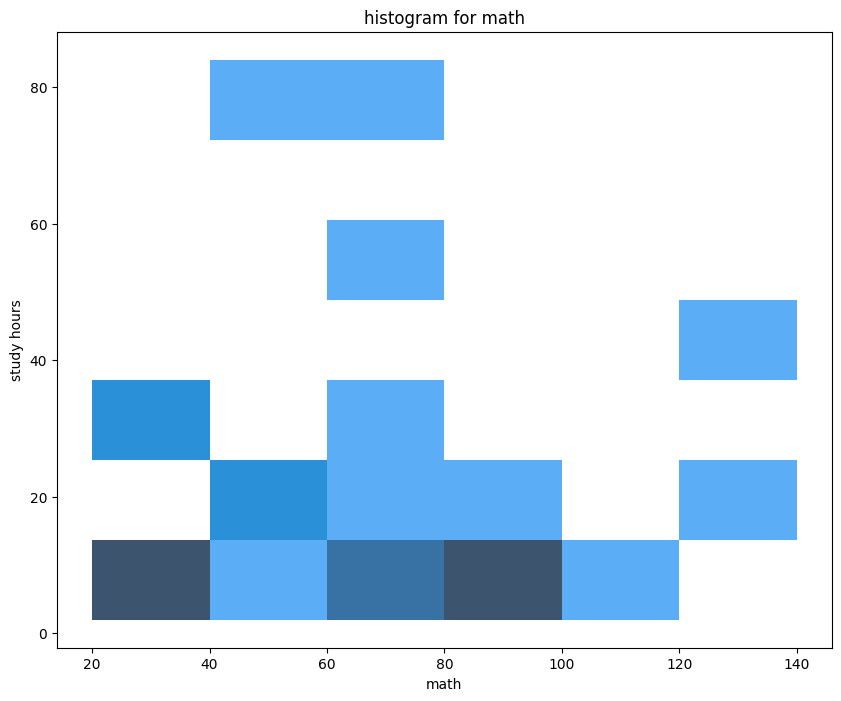

In [10]:
#Create a 2D Histogram
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='math',y='study hours',palette="Set2")
plt.title("histogram for math")
plt.show()

In [11]:
# 1. Handle Missing Values
print("Missing values before treatment:\n", df.isnull().sum())  #isnull().sum() checks each column for missing values
df.fillna(df.mean(numeric_only=True), inplace=True)         # fillna() fills missing value with the mean of column and numeric only ensures only numeric values are used
print("\nMissing values after treatment:\n", df.isnull().sum())

Missing values before treatment:
 sr no          0
english        0
math           0
study hours    0
dtype: int64

Missing values after treatment:
 sr no          0
english        0
math           0
study hours    0
dtype: int64


In [12]:
# 2. Treat Outliers using Winsorization (used when we don't what to drop the outliners but to reduce the impact)
from scipy.stats.mstats import winsorize

# Apply Winsorization to numeric columns
df['math'] = winsorize(df['math'], limits=[0.05, 0.05])
df['english'] = winsorize(df['english'], limits=[0.05, 0.05])
df['study hours'] = winsorize(df['study hours'], limits=[0.05, 0.05])

#Winsorization limits extreme values to reduce the effect of outliers. limits=[0.05, 0.05] means the bottom and top 5% of the data will be replaced by values at those percentiles.

In [13]:
# 3. Apply Power Transformation to Reduce Skewness
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
df['study_hours_transformed'] = pt.fit_transform(df[['study hours']])

#PowerTransformer reduces skewness and attempts to make the variable's distribution more Gaussian (normal). The transformed values are stored in a new column study_hours_transformed

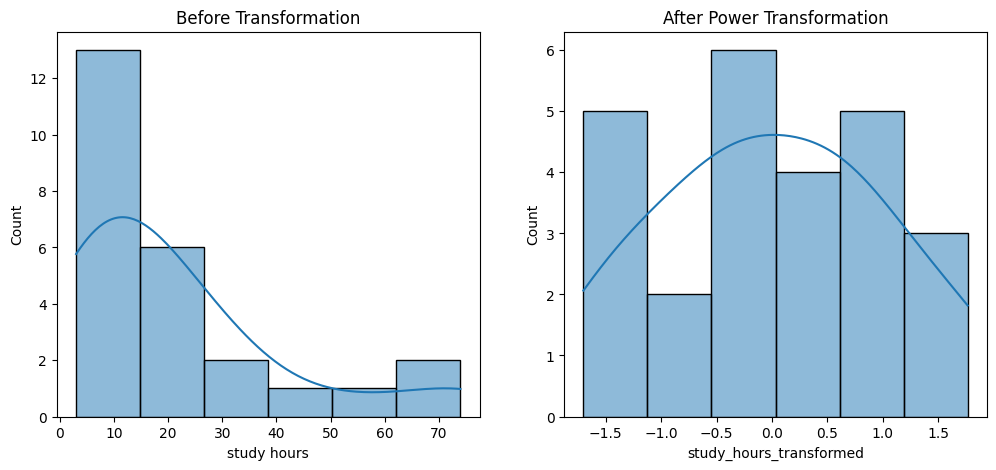

In [14]:
# Compare distribution before and after transformation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['study hours'], kde=True) # kde=True adds a smoothed curve to see the distribution shape.
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(df['study_hours_transformed'], kde=True) # kde=True adds a smoothed curve to see the distribution shape.
plt.title('After Power Transformation')
plt.show()